In [7]:
from google.colab import files
uploaded = files.upload()



Saving netflix_titles.csv to netflix_titles (1).csv


In [9]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("netflix_titles (1).csv")

# Show the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# Check missing values in each column
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
# Fill missing text values with "Unknown"
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)


/tmp/ipython-input-306218936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-306218936.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [12]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

print("After removing duplicates:", df.shape)


After removing duplicates: (8807, 12)


In [13]:
# Convert 'date_added' to datetime type (ignore errors for "Unknown")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year added as a new column
df['year_added'] = df['date_added'].dt.year


In [14]:
# View summary info
df.info()

# Check if any missing values remain
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,0
duration,3


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for graphs
plt.style.use('ggplot')


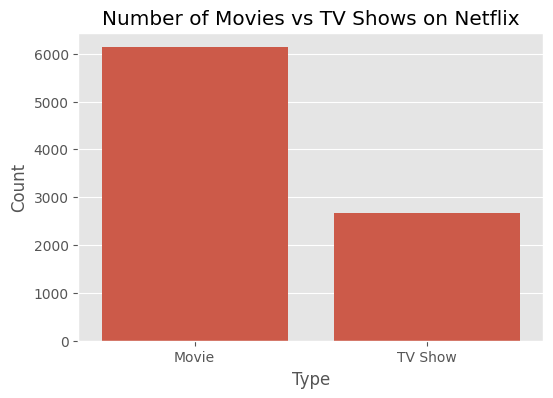

In [16]:
# Count how many are Movies and how many are TV Shows
type_count = df['type'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index, y=type_count.values)
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


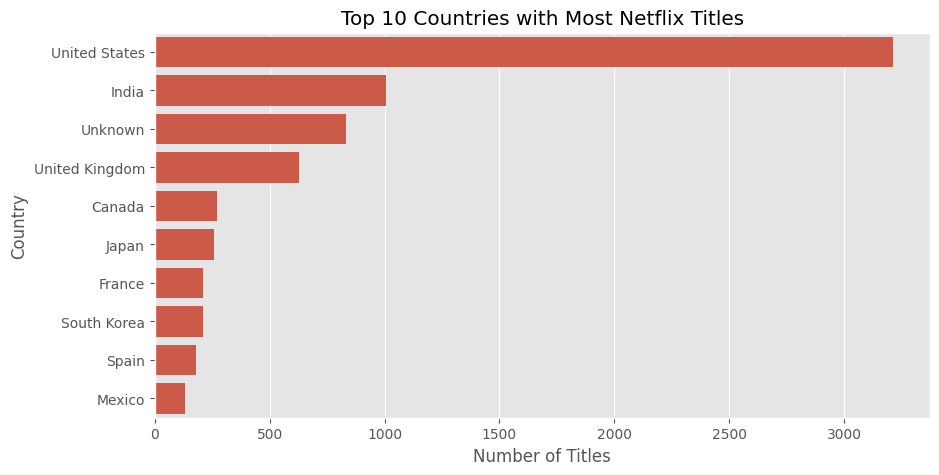

In [17]:
# Some entries have multiple countries separated by commas — take the first one
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


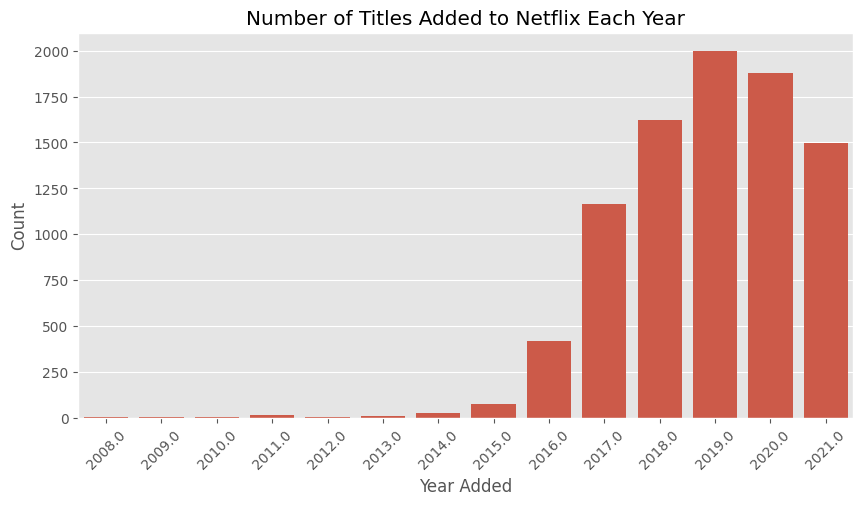

In [18]:
# Drop missing year_added
yearly = df.dropna(subset=['year_added'])

plt.figure(figsize=(10,5))
sns.countplot(x='year_added', data=yearly, order=sorted(yearly['year_added'].dropna().unique()))
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


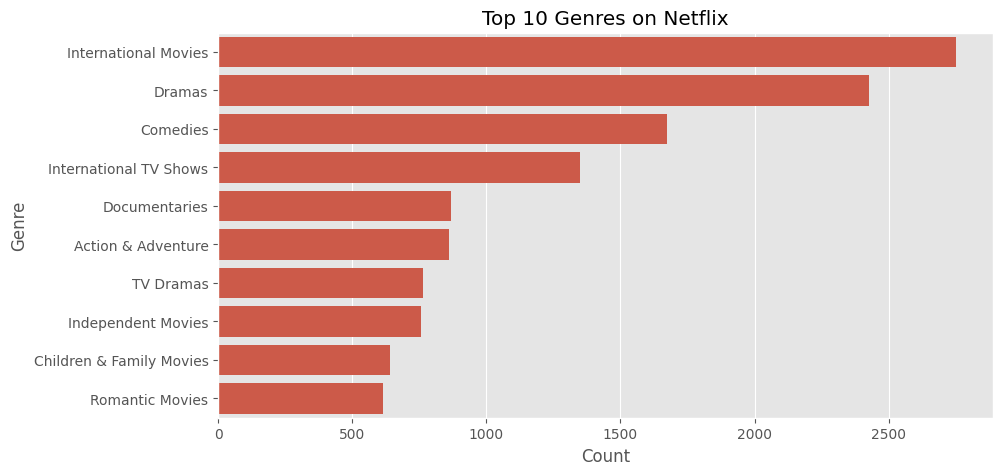

In [19]:
from collections import Counter

# Split the 'listed_in' column and count each genre
all_genres = []
for i in df['listed_in']:
    for genre in i.split(','):
        all_genres.append(genre.strip())

genre_count = Counter(all_genres).most_common(10)

# Convert to dataframe for plotting
genres_df = pd.DataFrame(genre_count, columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genres_df)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


 Netflix Movies & TV Shows Analysis — Insights

Movies dominate Netflix: Around 70% of total titles are movies, while 30% are TV shows.

Top contributing countries: The United States, India, and the United Kingdom produce the most Netflix content.

Content growth trend: Netflix saw a major surge in new titles added between 2015–2020.

Popular genres: The most common genres are International Movies, Dramas, and Comedies.

Most content is rated ‘TV-MA’, indicating Netflix’s focus on mature audience entertainment.

Average duration: Most movies are around 90–120 minutes, and TV shows average 1–2 seasons.